In [ ]:
import pandas as pd
import os
print(os.getcwd())

/content


In [ ]:
file_path = '/content/drive/MyDrive/ConceptOfAI_Workshops/WHR-2024-5CS037.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
happiness_df = pd.read_csv(file_path)

In [ ]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(happiness_df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [ ]:
# Get the shape of the dataset
num_rows, num_cols = happiness_df.shape
print(f"The dataset contains {num_rows} rows and {num_cols} columns.")

The dataset contains 143 rows and 9 columns.


In [ ]:
# List all columns and their data types
print("Columns and their data types:")
print(happiness_df.dtypes)

Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
# Calculate basic statistics for the Score column
score_mean = happiness_df['score'].mean()
score_median = happiness_df['score'].median()
score_std = happiness_df['score'].std()

print(f"Mean of Score: {score_mean:.2f}")
print(f"Median of Score: {score_median:.2f}")
print(f"Standard Deviation of Score: {score_std:.2f}")

Mean of Score: 5.53
Median of Score: 5.79
Standard Deviation of Score: 1.17


In [ ]:
# Find the country with the highest and lowest happiness scores
highest_score = happiness_df['score'].max()
lowest_score = happiness_df['score'].min()

highest_country = happiness_df[happiness_df['score'] == highest_score]['Country name'].values[0]
lowest_country = happiness_df[happiness_df['score'] == lowest_score]['Country name'].values[0]

print(f"The country with the highest score is {highest_country} with a score of {highest_score}.")
print(f"The country with the lowest score is {lowest_country} with a score of {lowest_score}.")

The country with the highest score is Finland with a score of 7.741.
The country with the lowest score is Afghanistan with a score of 1.721.


In [ ]:
# Check for missing values
missing_values = happiness_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filter the dataset for countries with Score > 7.5
filtered_df = happiness_df[happiness_df['score'] > 7.5]
print("Countries with Score > 7.5:")
print(filtered_df)

Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# Sort the filtered dataset by GDP per Capita in descending order
top_gdp_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top 10 countries with Score > 7.5, sorted by GDP per Capita:")
print(top_gdp_df)

Top 10 countries with Score > 7.5, sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
# Create a new column "Happiness Category"
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

happiness_df['Happiness Category'] = happiness_df['score'].apply(categorize_happiness)
print("Updated dataset with 'Happiness Category':")
print(happiness_df.head())

Updated dataset with 'Happiness Category':
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1              

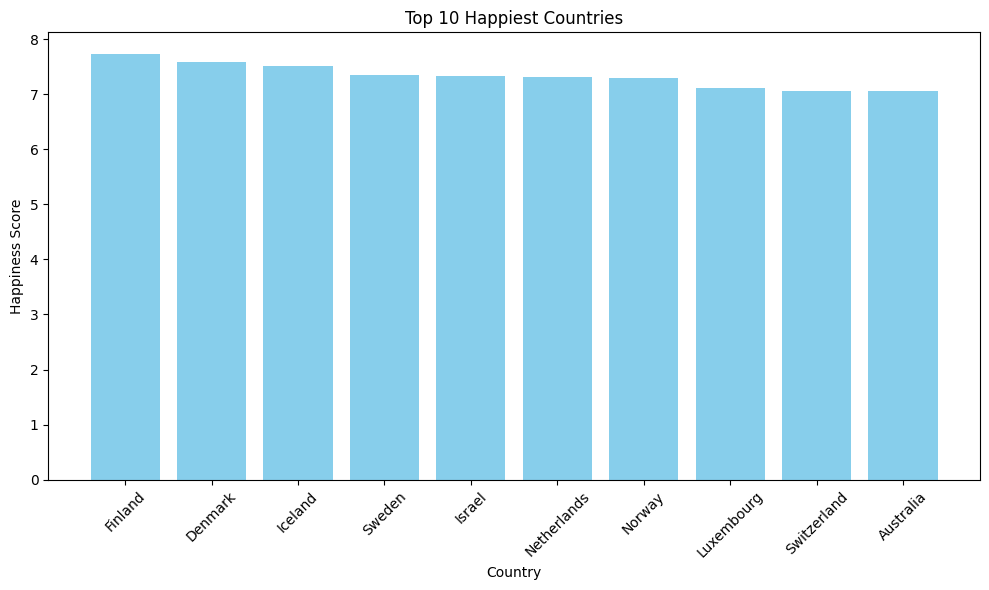

In [ ]:
import matplotlib.pyplot as plt

# Top 10 happiest countries
top_10_happiest = happiness_df.nlargest(10, 'score')

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title("Top 10 Happiest Countries")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

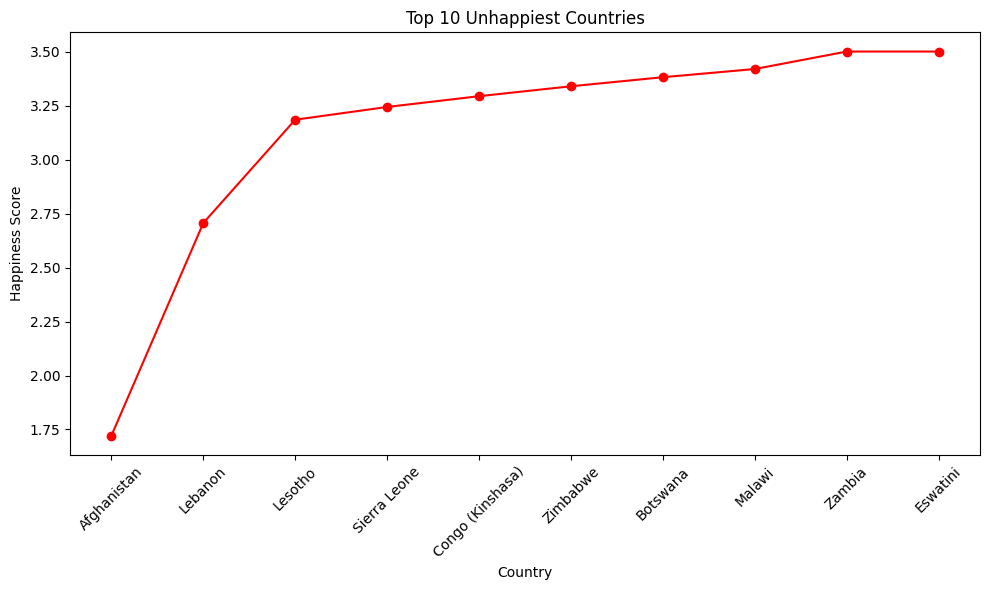

In [ ]:

# Top 10 unhappiest countries
bottom_10_unhappiest = happiness_df.nsmallest(10, 'score')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o', color='red')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

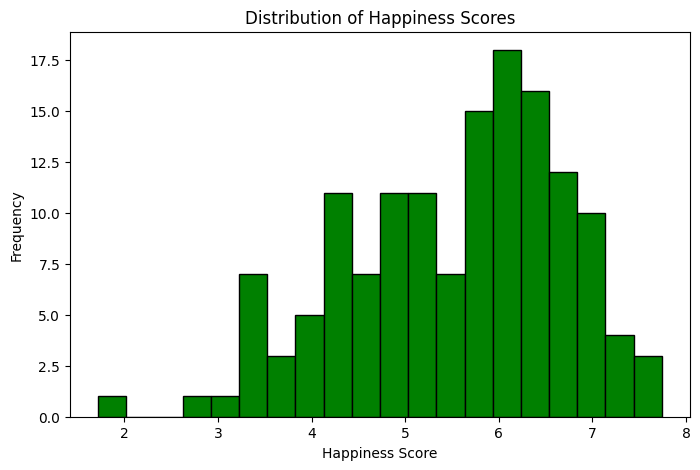

In [ ]:
# Histogram of the Score column
plt.figure(figsize=(8, 5))
plt.hist(happiness_df['score'], bins=20, color='green', edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

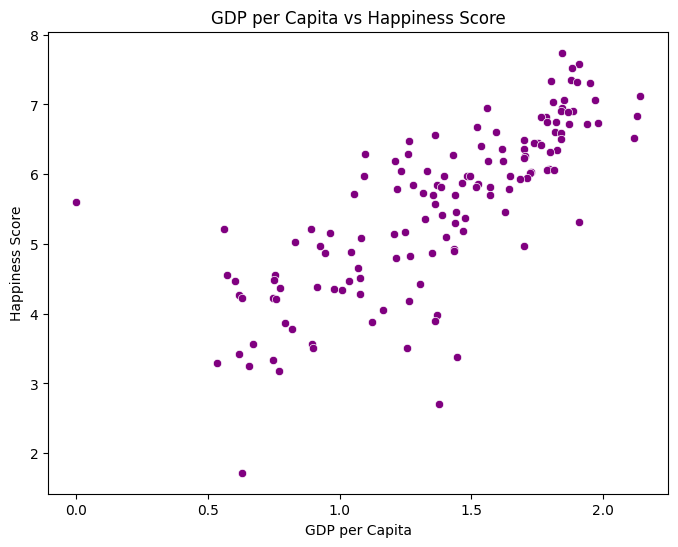

In [ ]:
import seaborn as sns

# Scatter plot between GDP per Capita and Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=happiness_df, color='purple')
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

In [ ]:
#problem 2
# Step 1: Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset for South Asian countries
south_asia_df = happiness_df[happiness_df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataset to a new CSV file
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)

# Display the filtered dataset
print("South Asia Dataset:")
print(south_asia_df)

South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of

<ipython-input-20-92088b4d0da5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.4 * south_asia_df['Log GDP per capita'] +


Top 5 South Asian Countries based on Composite score:
    Country name  score
127    Sri Lanka  3.898
92         Nepal  5.158
125        India  4.054
107     Pakistan  4.657
128   Bangladesh  3.886


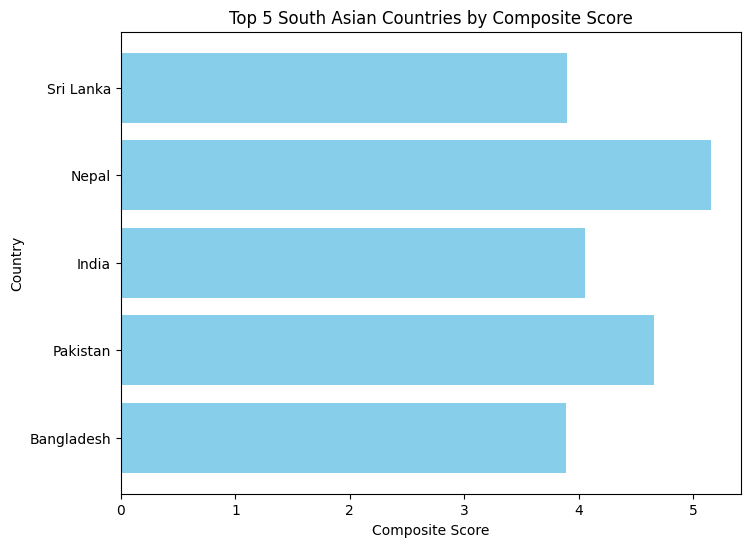

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Create the Composite Score
south_asia_df['Composite Score'] = (0.4 * south_asia_df['Log GDP per capita'] +
                                    0.3 * south_asia_df['Social support'] +
                                    0.3 * south_asia_df['Healthy life expectancy'])

# Step 2: Rank the countries based on Composite Score
south_asia_df_sorted = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the top 5 countries
print("Top 5 South Asian Countries based on Composite score:")
print(south_asia_df_sorted[['Country name','score']].head(5))
# Step 3: Visualize the top 5 countries using a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(south_asia_df_sorted['Country name'].head(5),
         south_asia_df_sorted['score'].head(5),
         color='skyblue')

plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import numpy as np

# Step 1: Calculate IQR for Score and GDP per Capita
Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp





In [ ]:
# Step 2: Define outlier thresholds
lower_score = Q1_score - 1.5 * IQR_score
upper_score = Q3_score + 1.5 * IQR_score

lower_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_gdp = Q3_gdp + 1.5 * IQR_gdp



In [ ]:
# Step 3: Detect outliers
outliers = south_asia_df[(south_asia_df['score'] < lower_score) | (south_asia_df['score'] > upper_score) |
                         (south_asia_df['Log GDP per capita'] < lower_gdp) | (south_asia_df['Log GDP per capita'] > upper_gdp)]



In [ ]:
# Display outlier countries
print("Outlier Countries:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])



Outlier Countries:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


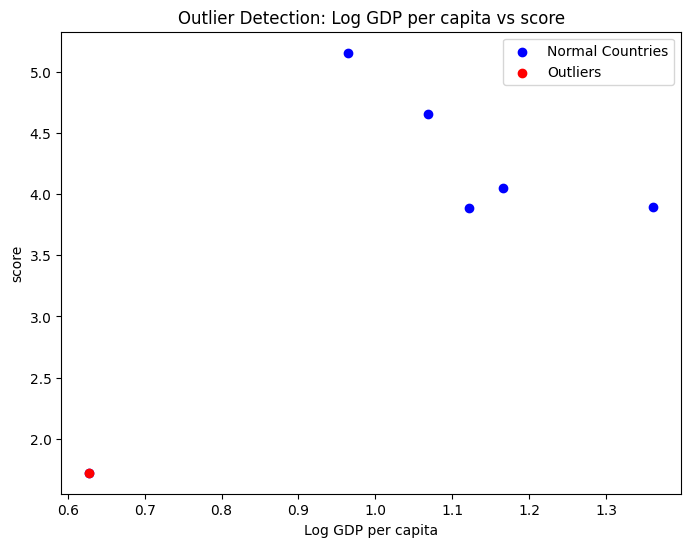

In [ ]:
# Step 4: Visualize the outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Normal Countries')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')

plt.xlabel("Log GDP per capita")
plt.ylabel("score")
plt.title("Outlier Detection: Log GDP per capita vs score")
plt.legend()
plt.show()

In [ ]:
# Task - 4: Exploring Trends Across Metrics
# 1. Calculate correlations for two metrics with Happiness Score
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'

correlation_1 = south_asia_df['score'].corr(south_asia_df[metric_1])
correlation_2 = south_asia_df['score'].corr(south_asia_df[metric_2])

print(f"\nCorrelation between Happiness Score and {metric_1}: {correlation_1:.2f}")
print(f"Correlation between Happiness Score and {metric_2}: {correlation_2:.2f}")






Correlation between Happiness Score and Freedom to make life choices: 0.80
Correlation between Happiness Score and Generosity: 0.87


In [ ]:
# Task - 5: Gap Analysis
# 1. Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']



<ipython-input-34-7891f4f31b09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


In [ ]:
# 2. Rank countries by GDP-Score Gap (ascending and descending)
gap_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
gap_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("\nTop 3 Countries with Largest Positive GDP-Score Gap:")
print(gap_descending.head(3)[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Countries with Largest Negative GDP-Score Gap:")
print(gap_ascending.head(3)[['Country name', 'GDP-Score Gap']])




Top 3 Countries with Largest Positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Countries with Largest Negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


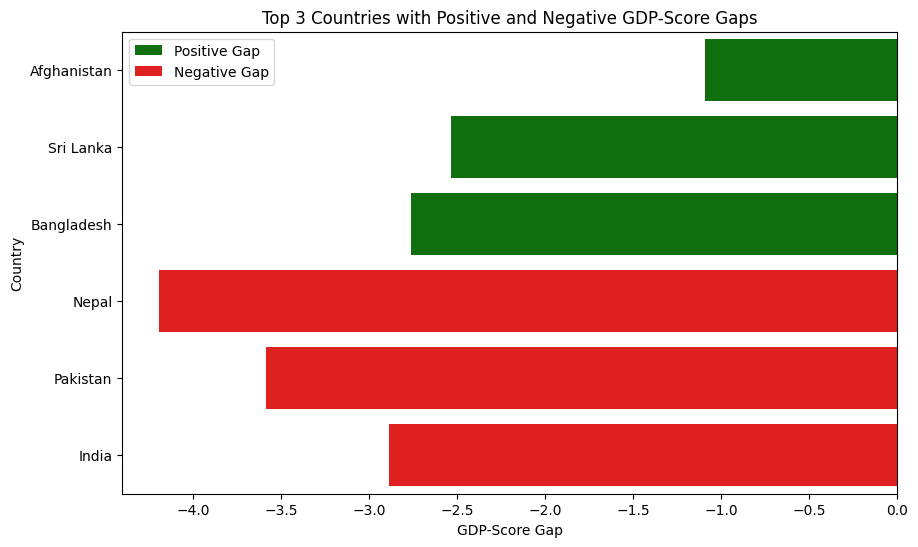

In [ ]:
# 3. Visualize top 3 countries for both positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_descending.head(3), color='green', label='Positive Gap')
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_ascending.head(3), color='red', label='Negative Gap')
plt.title('Top 3 Countries with Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = happiness_df[happiness_df['Country name'].isin(middle_east_countries)]
print("\nMiddle East Dataset:")
print(middle_east_df)

# 1. Descriptive Statistics:
# Calculate mean and standard deviation of Score for South Asia and Middle East
print("\nDescriptive Statistics:")

print(f"South Asia Mean Happiness Score: {south_asia_df['score'].mean():.2f}")
print(f"Middle East Mean Happiness Score: {middle_east_df['score'].mean():.2f}")

print(f"South Asia Standard Deviation: {south_asia_df['score'].std():.2f}")
print(f"Middle East Standard Deviation: {middle_east_df['score'].std():.2f}")

# Determine which region has a higher average happiness score
higher_region = "South Asia" if south_asia_df['score'].mean() > middle_east_df['score'].mean() else "Middle East"
print(f"\nRegion with Higher Average Happiness Score: {higher_region}")




Middle East Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         


Top and Bottom Performers:
Top 3 South Asian Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


<ipython-input-38-b3960594ddb1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=south_asia_df.nlargest(3, 'score'), palette='Blues_d')


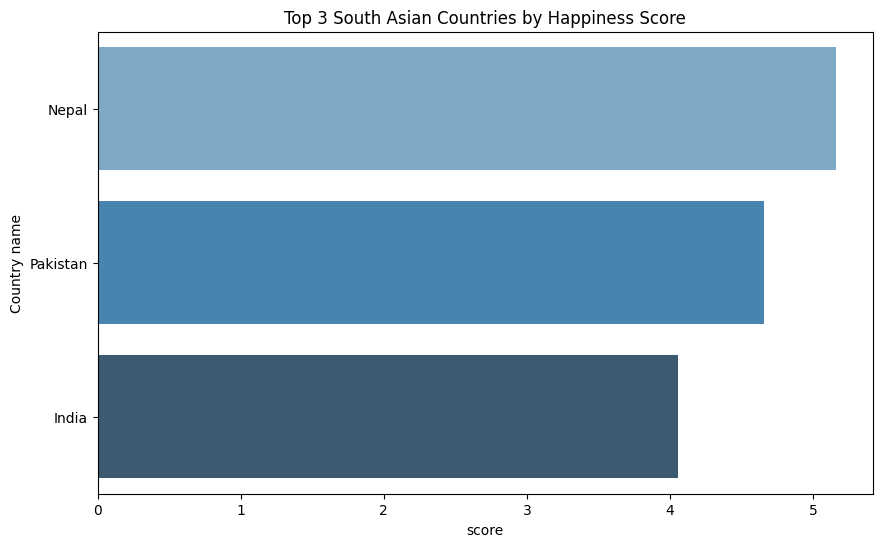

<ipython-input-38-b3960594ddb1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=middle_east_df.nlargest(3, 'score'), palette='Oranges_d')


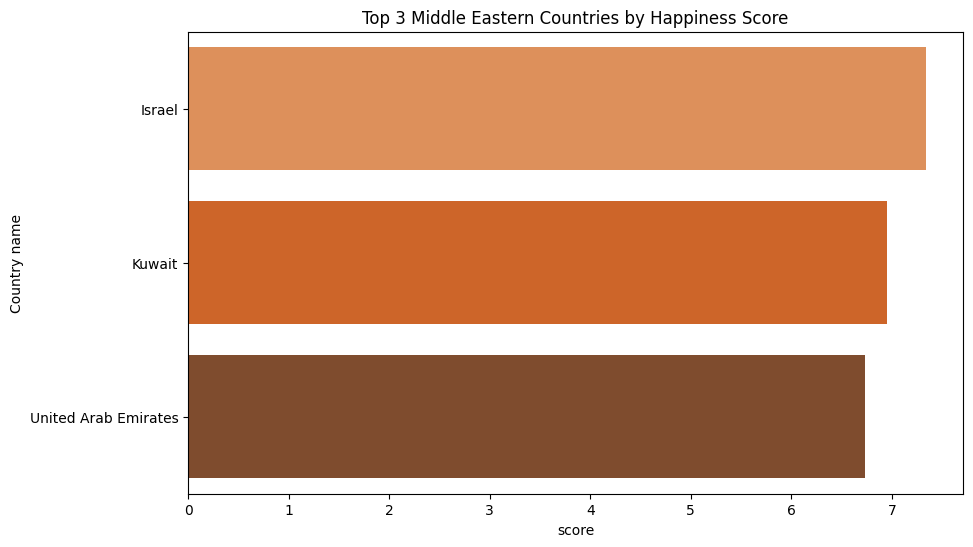

In [ ]:
# 2. Top and Bottom Performers:
# Identify top 3 and bottom 3 countries based on score for each region
print("\nTop and Bottom Performers:")

print("Top 3 South Asian Countries:")
print(south_asia_df.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 South Asian Countries:")
print(south_asia_df.nsmallest(3, 'score')[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries:")
print(middle_east_df.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries:")
print(middle_east_df.nsmallest(3, 'score')[['Country name', 'score']])

# Plot bar charts for top and bottom performers
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=south_asia_df.nlargest(3, 'score'), palette='Blues_d')
plt.title('Top 3 South Asian Countries by Happiness Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=middle_east_df.nlargest(3, 'score'), palette='Oranges_d')
plt.title('Top 3 Middle Eastern Countries by Happiness Score')
plt.show()



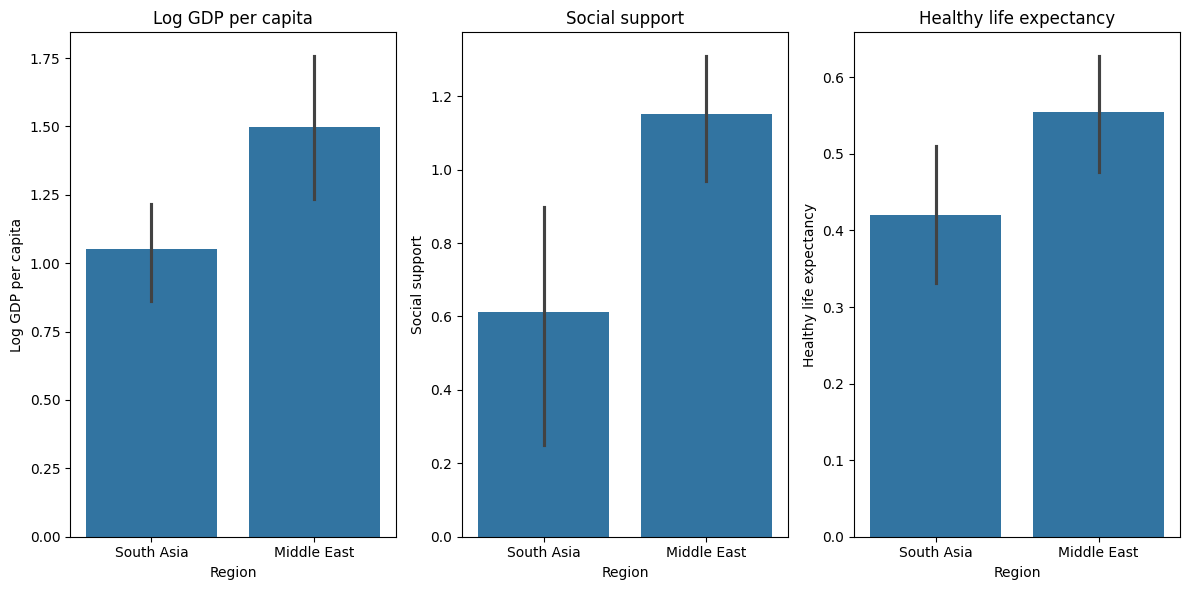

In [ ]:
# 3. Metric Comparisons:
# Compare GDP per Capita, Social Support, and Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Region', y=metric, data=pd.concat([
        south_asia_df.assign(Region='South Asia'),
        middle_east_df.assign(Region='Middle East')
    ]))
    plt.title(metric)

plt.tight_layout()
plt.show()



In [ ]:
# 4. Happiness Disparity:
# Compute range and coefficient of variation (CV) for Score
def compute_stats(df, region_name):
    score_range = df['score'].max() - df['score'].min()
    score_cv = (df['score'].std() / df['score'].mean()) * 100
    print(f"\n{region_name} Happiness Score Range: {score_range:.2f}")
    print(f"{region_name} Happiness Score Coefficient of Variation: {score_cv:.2f}%")

compute_stats(south_asia_df, "South Asia")
compute_stats(middle_east_df, "Middle East")




South Asia Happiness Score Range: 3.44
South Asia Happiness Score Coefficient of Variation: 30.21%

Middle East Happiness Score Range: 4.63
Middle East Happiness Score Coefficient of Variation: 28.94%



Correlation Analysis:
Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


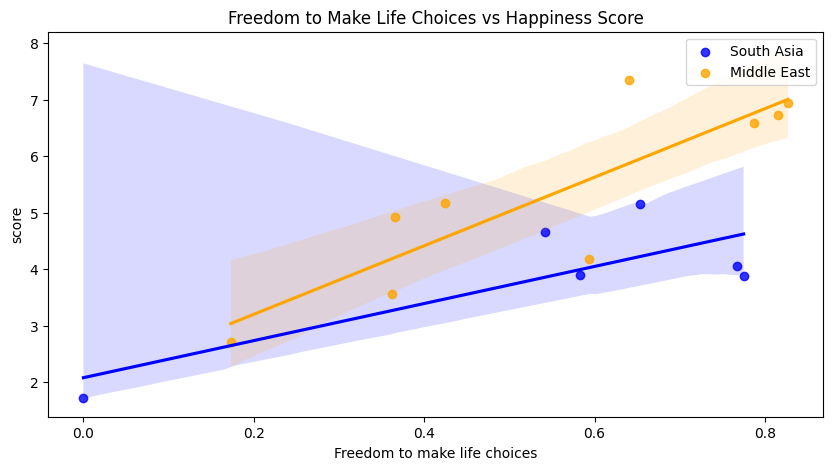

In [ ]:
# 5. Correlation Analysis:
# Correlation of Score with Freedom and Generosity
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

print("\nCorrelation Analysis:")
for metric in metrics_to_correlate:
    south_corr = south_asia_df['score'].corr(south_asia_df[metric])
    middle_corr = middle_east_df['score'].corr(middle_east_df[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_corr:.2f}")

# Scatter plot for correlation visualization
plt.figure(figsize=(10, 5))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, label='South Asia', color='blue')
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, label='Middle East', color='orange')
plt.title("Freedom to Make Life Choices vs Happiness Score")
plt.legend()
plt.show()



In [ ]:
# 6. Outlier Detection:
# Detect outliers in Score and GDP per Capita using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_south = detect_outliers(south_asia_df, 'score')
outliers_middle = detect_outliers(middle_east_df, 'score')

print("\nOutliers in South Asia based on Score:")
print(outliers_south[['Country name', 'score']])

print("\nOutliers in Middle East based on Score:")
print(outliers_middle[['Country name', 'score']])




Outliers in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


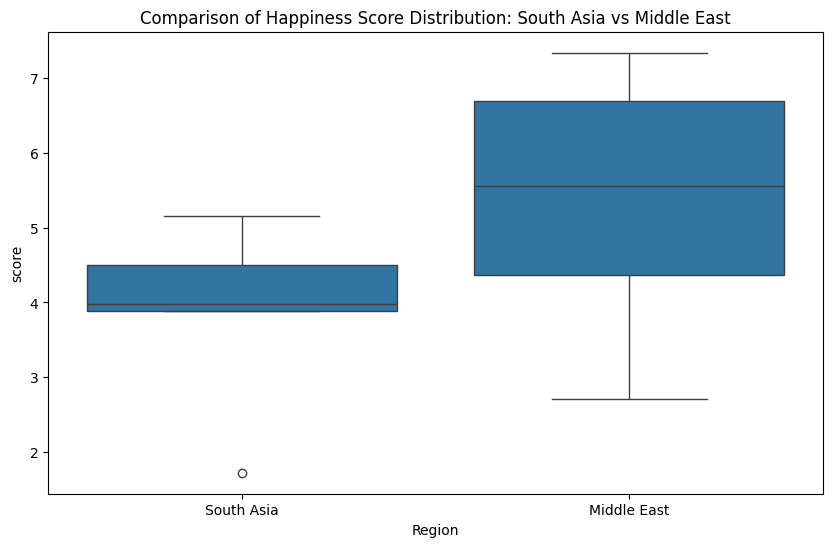

In [ ]:
# 7. Visualization: Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
]))
plt.title("Comparison of Happiness Score Distribution: South Asia vs Middle East")
plt.show()